In [1]:
import matplotlib.pyplot as plt
import gpxpy
import gpxpy.gpx
import numpy as np
import calendar
import os
import glob

In [2]:
def read_gpx_coord(filename):
    with open(filename, "r") as gf:
        gpx = gpxpy.parse(gf)
        lon = []
        lat = []
        ele = []
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    lon.append(point.longitude)
                    lat.append(point.latitude)
                    ele.append(point.elevation)
        lon = np.array(lon)
        lat = np.array(lat)
        ele = np.array(ele)
        gpxdate = gpx.get_time_bounds()[0]

    return lon, lat, ele, gpxdate

In [3]:
gpxdirlist = ["/home/ctroupin/Projects/ctroupin.github.io/leaflet/GPX/2018/",
              "/data/GPX/GranCanaria/2018/",
              "/data/GPX/Belgique/2018/Verviers/",
              "/data/GPX/Belgique/2018/",
              "/data/GPX/Porto/",
              "/data/GPX/Delft/",
              "/data/GPX/Hamburg/",
              "/data/GPX/Barcelona/",
              "/data/GPX/Piran-Slovenia-Trieste/"]
colorlist = ["b", "y", "g", "r", "#0E8187", "m", "w", "#F59320", "#784CFA"]
placelist = ["Sart Tilman", "Gran Canaria", "Verviers", "Belgium", "Porto",
            "Delft", "Hamburg", "Barcelona", "Slovenia & Triest"]

In [28]:
nn = 12 + len(colorlist)
fig = plt.figure(figsize=(30, nn), facecolor="black")
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
for i in range(0, 31):
    ax = plt.subplot(nn,31,i+1)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(str(i+1), color="w", fontsize=30)

for i in range(0, 12):
    ax = plt.subplot(nn,31,1+(i*31))
    ax.set_ylabel(calendar.month_name[i+1], color="w", fontsize=30,
                 rotation=0, ha="right", va="center")
    
for gpxdir, color in zip(gpxdirlist, colorlist):
    gpxlist = sorted(glob.glob(os.path.join(gpxdir, "*.gpx")))
    print("Directory {}: {}".format(gpxdir, len(gpxlist)))
    for gpxfile in gpxlist[:1]:
        lon, lat, ele, date = read_gpx_coord(gpxfile)
        daynum = (date.month-1) * 31 + date.day
        ax = plt.subplot(nn,31,daynum)
        # ax.patch.set_facecolor('black')
        scat = plt.scatter(lon, lat, s=3, c=ele, vmin=0, vmax=1800.)
        plt.xticks()
        plt.yticks()
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        #plt.tick_params(axis='both', which='both', bottom='off', 
        #                top='off', labelbottom='off', right='off', 
        #                left='off', labelleft='off')
        dlon = lon.max() - lon.min()
        dlat = lat.max() - lat.min()
        ratio = 0.1
        plt.xlim(lon.min() - ratio * dlon, lon.max() + ratio * dlon)
        plt.ylim(lat.min() - ratio * dlat, lat.max() + ratio * dlat)
        ax.spines['left'].set_color(color)
        ax.spines['left'].set_linewidth(2)
        ax.spines['right'].set_color(color)
        ax.spines['right'].set_linewidth(2)
        ax.spines['top'].set_color(color)
        ax.spines['top'].set_linewidth(2)
        ax.spines['bottom'].set_color(color)
        ax.spines['bottom'].set_linewidth(2)

for i, col in enumerate(colorlist):
    ii = i % 3
    jj = i // 3
    ax = plt.subplot(nn,31,(12+jj)*31+1+ii*8)
    plt.xticks()
    plt.yticks()
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.spines['left'].set_color(col)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_color(col)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_color(col)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color(col)
    ax.spines['bottom'].set_linewidth(2)
    
    ax = plt.subplot(nn,31,(12+jj)*31+ii*8+2)
    plt.xticks()
    plt.yticks()
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.text(.5, .5, placelist[i], color="white", fontsize=20)
    
ax = plt.subplot(nn,31,(12+1)*31+28)
plt.colorbar(scat, cax=ax)
    
    
plt.savefig("gpx_mosaic14", dpi=300, facecolor=fig.get_facecolor(), 
            edgecolor='none', bbox_inches="tight")
#plt.show()
plt.close()
print("Done")

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Directory /home/ctroupin/Projects/ctroupin.github.io/leaflet/GPX/2018/: 72
Directory /data/GPX/GranCanaria/2018/: 41
Directory /data/GPX/Belgique/2018/Verviers/: 240
Directory /data/GPX/Belgique/2018/: 12
Directory /data/GPX/Porto/: 6
Directory /data/GPX/Delft/: 7
Directory /data/GPX/Hamburg/: 3
Directory /data/GPX/Barcelona/: 13
Directory /data/GPX/Piran-Slovenia-Trieste/: 121
Done


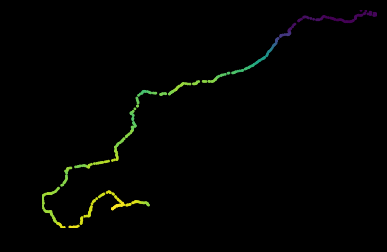

In [52]:
ax = plt.subplot(111)
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.scatter(lon, lat, s=3, c=ele)
plt.axis('off')
plt.xlim(lon.min(), lon.max())
plt.ylim(lat.min(), lat.max())
ax.patch.set_facecolor('black')
plt.show()
plt.close()